<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Justin Pham
* **UCID** = 30139323
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [86]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets.loaders import load_concrete

# Load the spam dataset
data = load_concrete(return_dataset=True)

# TO DO: Print size and type of X and y
X, y = data.to_data()
print(f"X.shape: {X.shape}, Y.shape: y.shape")
print(f"type(x): {type(X)} \ntypes(y): {type(y)}")

X.shape: (1030, 8), Y.shape: y.shape
type(x): <class 'pandas.core.frame.DataFrame'> 
types(y): <class 'pandas.core.series.Series'>


## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [87]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Import Decision tree, random forest, and gradient boosting from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
# 2. Instantiate the models with parameters
max_depth = 5
n_estimators = 100
learning_rate = 0.1
random_state = 0

dt = DecisionTreeRegressor(max_depth=max_depth, random_state=random_state)
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
gb = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state)

# 3. Implement each model with X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Calculate average training and validation accuracy with MSE cross-validation
from sklearn.model_selection import cross_validate
from sklearn import metrics

scoring="neg_mean_squared_error"

accuracies = {}
models = [dt, rf, gb]

# Perform cross-validation for each model
for model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=True)
    accuracies[model.__class__.__name__] = {
        "train": -1 * cv_results["train_score"].mean(),
        "test": -1 * cv_results["test_score"].mean()
    }

# 1. Create a pandas dataframe with the accuracies
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=["DT", "RF", "GB"])

# 2. Add the accuracies to the dataframe
for index, (k, v) in enumerate(accuracies.items()):
    results.iloc[index] = [v["train"], v["test"]]

# 3. Print the results
print(results)

   Training Accuracy Validation Accuracy
DT         47.918561          163.087775
RF         32.055432          156.404972
GB           3.73927           99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [88]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.

scoring="r2"

accuracies = {}
models = [dt, rf, gb]

# Perform cross-validation for each model
for model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=True)
    accuracies[model.__class__.__name__] = {
        "train": cv_results["train_score"].mean(),
        "test": cv_results["test_score"].mean()
    }

# 1. Create a pandas dataframe with the accuracies
results = pd.DataFrame(columns=["Training R2", "Validation R2"], index=["DT", "RF", "GB"])

# 2. Add the accuracies to the dataframe
for index, (k, v) in enumerate(accuracies.items()):
    results.iloc[index] = [v["train"], v["test"]]

# 3. Print the results
print(results)

   Training R2 Validation R2
DT    0.822887       0.17621
RF    0.881221      0.173748
GB    0.986436      0.473701


In [89]:
accuracies = {}
models = [dt, rf, gb]
for model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
    cv_results1 = cross_validate(model, X, y, cv=5, scoring="r2", return_train_score=True)
    
    accuracies[model.__class__.__name__] = {
        "trainMSE": -1 * cv_results["train_score"].mean(),
        "testMSE": -1 * cv_results["test_score"].mean(),
        "trainR2": cv_results1["train_score"].mean(),
        "testR2": cv_results1["test_score"].mean(),
    }

results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy", "Training R2", "Validation R2"], index=["DT", "RF", "GB"])
for index, (k, v) in enumerate(accuracies.items()):
    results.iloc[index] = [v["trainMSE"], v["testMSE"], v["trainR2"], v["testR2"]]
print(results)

   Training Accuracy Validation Accuracy Training R2 Validation R2
DT         47.918561          163.087775    0.822887       0.17621
RF         32.055432          156.404972    0.881221      0.173748
GB           3.73927           99.360259    0.986436      0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>

1. The R2 training accuracy scores for the linear model (0.61) are lower than those of the tree-based models (DT: 0.82, RF: 0.88, GB: 0.99) from assignment 2. However, on unseen data, the trend flips. The linear model (0.64 R2 Validation accuracy) outperforms all tree-based models (DT: 0.18, RF: 0.17, GB: 0.47 R2). This suggests overfitting in the tree-based models. They excel on training data but fail to generalize well to new examples.

Linear Model results
```
     Training Accuracy  Validation Accuracy
MSE         110.345501            95.635335
R2            0.609071             0.636898
```

Tree Based Model results
```
   Training Accuracy Validation Accuracy Training R2 Validation R2
DT         47.918561          163.087775    0.822887       0.17621
RF         32.055432          156.404972    0.881221      0.173748
GB           3.73927           99.360259    0.986436      0.473701


```

1. From the models created in this assignment, DT, RF, and GB, I would choose the GB model because of it's high scores. We can see that GB outperformed DT and RF in both accuracy and R2 in all scenarios. What was especially impressive was the Validation R2 score where GB received a score of `(0.47)` compared to DT and RF's scores of `(0.18, 0.17)` respectively.

1. To increase the accuracy of the tree-based models, there are a few options and parameters we can tune. The first option could be to increase the size of the data set. With more data, the models will get closer to the true value of the data.
The second option could be to increase the max_depth of the trees. In this assignment, we set max_depth = 5, meaning that the trees would have a total depth of 5. By increasing this value closer, overfitting is increased, but we may see higher accuracy scores.

</b></font>

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>

1. Where did you source your code?
All the code generated in this assignment was done personally, from the previous assignments and labs,  and through github copilot.
1. In what order did you complete the steps?
I completed the steps from top to bottom in order.
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did not need to use any prompts as copilot automatically suggested code based on the entire repository.
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
One of the challenges I had was with cross_validation(). I was not familiar with the use of this function and did not see it being used in previous labs and assignments. Reading the documentation helped me become successful and overcome this challenge

</b></font>

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [90]:
import pandas as pd

# Replace 'your_data.data' with the actual filename and path
attributes = [
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
data = pd.read_csv("wine.data")
# Access the data as a DataFrames
data.columns = ["Class"] + attributes

y = data["Class"]
X = data[attributes]
print(f"X.shape: {X.shape}, Y.shape: {y.shape}")
print(f"type(x): {type(X)} \ntypes(y): {type(y)}")

# Target vector is the "Class" column


X.shape: (177, 13), Y.shape: (177,)
type(x): <class 'pandas.core.frame.DataFrame'> 
types(y): <class 'pandas.core.series.Series'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [91]:
# TO DO: ADD YOUR CODE HERE
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [92]:
# TO DO: ADD YOUR CODE HERE
checkX = X.isnull().sum()
checkX

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [93]:
# TO DO: ADD YOUR CODE HERE
# wineA = [wine for wine in y if wine == 1]
# wineB = [wine for wine in y if wine == 2]
# wineC = [wine for wine in y if wine == 3]
# print(f"Class 1: {len(wineA)}")
# print(f"Class 2: {len(wineB)}")
# print(f"Class 3: {len(wineC)}")
y.value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [94]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Step 3. Import the models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, train_test_split
random_state = 0
svcModel = SVC( random_state=random_state)
dtModel = DecisionTreeClassifier(max_depth=3, random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

svcModel.fit(X_train, y_train)
dtModel.fit(X_train, y_train)
# Step 4. Validate the models
scoring = "accuracy"
svc_cv_results = cross_validate(svcModel, X, y, cv=5, scoring=scoring, return_train_score=True)
svcResults = {
    "train": svc_cv_results["train_score"].mean(),
    "test": svc_cv_results["test_score"].mean()
}
dt_cv_results = cross_validate(dtModel, X, y, cv=5, scoring=scoring, return_train_score=True)
dtResults = {
    "train": dt_cv_results["train_score"].mean(),
    "test": dt_cv_results["test_score"].mean()
}

# Step 5: Visualize the results
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=["SVC", "DT"])
results.iloc[0] = [svcResults["train"], svcResults["test"]]
results.iloc[1] = [dtResults["train"], dtResults["test"]]
print(results)

# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

    Training Accuracy Validation Accuracy
SVC          0.703456            0.644603
DT           0.967556            0.926984


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

Confusion Matrix for SVC
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.81      0.85      0.83        20
           3       0.62      0.56      0.59         9

    accuracy                           0.82        45
   macro avg       0.79      0.78      0.79        45
weighted avg       0.82      0.82      0.82        45



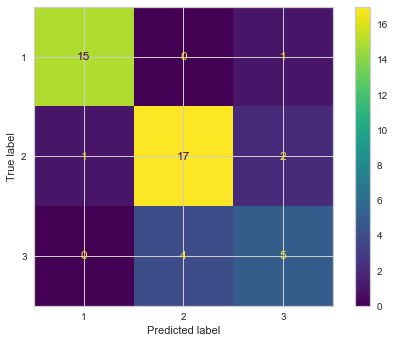

In [95]:
# TO DO: Implement best model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, svcModel.predict(X_test), labels=svcModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svcModel.classes_)

print("Confusion Matrix for SVC")
disp.plot()
print(classification_report(y_test, svcModel.predict(X_test)))



In [96]:
incorrect_count = np.sum(cm != np.diag(cm))
print(f"Number of incorrectly classified samples: {incorrect_count}")

Number of incorrectly classified samples: 6


Confusion Matrix for DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.85      0.92        20
           3       0.82      1.00      0.90         9

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.94      0.93      0.93        45



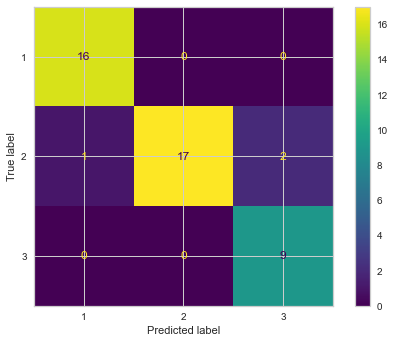

In [97]:
cm = confusion_matrix(y_test, dtModel.predict(X_test), labels=dtModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtModel.classes_)

print("Confusion Matrix for DecisionTreeClassifier")
disp.plot()
print(classification_report(y_test, dtModel.predict(X_test)))

In [98]:
incorrect_count = np.sum(cm != np.diag(cm))
print(f"Number of incorrectly classified samples: {incorrect_count}")

Number of incorrectly classified samples: 6


## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>

1. The analysis reveals that the Decision Tree classifier significantly outperforms the SVC model based on both training and validation accuracy:

Training Accuracy: Decision Tree (0.97) vs. SVC (0.70)
Validation Accuracy: Decision Tree (0.93) vs. SVC (0.64)

```
    Training Accuracy Validation Accuracy
SVC          0.703456            0.644603
DT           0.967556            0.926984
```
1. The first reason why SVM models did not perform as well as tree based models may be due to the nature of the data. Generally, SVMs work well on linear separable data and decision trees are more flexible and can support non-linear data. Perhaps the nature of the wine dataset was non-linear. Another reason why the SVM model did not perform as well may be due to an inappropriate kernel selection. The kernel function that was used was the "RBF", or "Radial Basis Function" which is the default kernal in sklearn's SVC class. Perhaps a different kernal function such as "sigmoid" would have performed better.

1. For the decision tree classifier and SVC, the number of incorrectly classified samples in each model was 6. 

1. Precision answers the question, "Out of all the items the model classified as positive, how many were actually positive." Recall answers the question, "Out of all the actual positve cases, how many did the model correctly identify as positive." In wine classification, high precision might be more crucial. Misclassifying a wine (false positive) could be more detrimental than missing some legitimate examples (false negative). For instance, recommending a low-quality wine as high-quality could damage customer trust, whereas missing a potentially good wine might be less critical. However, the final choice between prioritizing precision or recall depends on the specific costs and priorities of your specific task.


</b></font>

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>
1. Where did you source your code? 
All the code generated in this assignment was done personally, from the previous assignments and labs,  and through github copilot.

1. In what order did you complete the steps?
I completed the steps from top to bottom in order.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
The prompt I used for this part of the assignment was this:
```How can I find out how many samples were incorrectly classified```
The response was:
`incorrect_count = np.sum(cm != np.diag(cm))`
I did this because it was not obvious how I could have achieved this otherwise as I was not very familiar with numpy methods.


1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
The only challenge I had was determining the number of incorrect samples. I considered just reading off the confusion matrix but realized that it would take too long. Instead, I used AI tools to help me find a function to find the number of incorrect samples.

</b></font>

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>

An obvious pattern in this part is the comparison in performance between decisionTreeClassifier model and support vector machine model. This can be seen in the weighted average f1-score of SVC and Decision tree (0.82, vs 0.93) respectively. This may be due to the nature of the wine dataset. Decision trees are more flexible than SVMs and can handle linear and non-linear data. SVMs generally work with linearly separable data but need to be tuned and extended with an appropriate kernal function. 

</b></font>

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>
In this assignment, I enjoyed practicing with machine learning models and applying concepts we have learned in lecture, especially the ideas of using decision trees and seeing the changes in performance in RF and GB.
Something I found very interesting was the wine dataset, since it never occured to me how something as trivial as wine could have been classified with machine learning techniques.
</b></font>

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

c:\Users\night\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\night\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\night\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\night\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\night\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\night\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

          Training Accuracy Validation Accuracy
SVC                0.703456            0.644603
DT                 0.967556            0.926984
LinearSVC            0.8728             0.83127
Confusion Matrix for LinearSVC
              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.83      0.95      0.88        20
           3       0.73      0.89      0.80         9

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.83        45
weighted avg       0.87      0.84      0.84        45

Number of incorrectly classified samples: 6


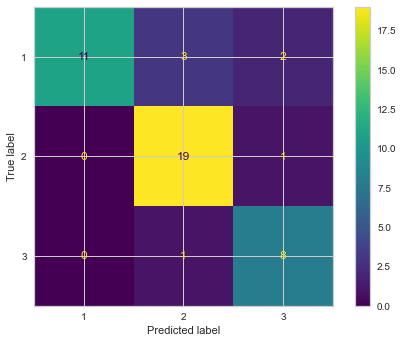

In [99]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC
linearSVC = LinearSVC(random_state=random_state, max_iter=5000)
linearSVC.fit(X_train, y_train)

# Step 4. Validate the models
scoring = "accuracy"
linearSVC_cv_results = cross_validate(linearSVC, X, y, cv=5, scoring=scoring, return_train_score=True)
linearSVCResults = {
    "train": linearSVC_cv_results["train_score"].mean(),
    "test": linearSVC_cv_results["test_score"].mean()
}

# Step 5: Visualize the results
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=["SVC", "DT", "LinearSVC"])
results.iloc[0] = [svcResults["train"], svcResults["test"]]
results.iloc[1] = [dtResults["train"], dtResults["test"]]
results.iloc[2] = [linearSVCResults["train"], linearSVCResults["test"]]
print(results)

cm = confusion_matrix(y_test, linearSVC.predict(X_test), labels=linearSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linearSVC.classes_)
print("Confusion Matrix for LinearSVC")
disp.plot()
print(classification_report(y_test, linearSVC.predict(X_test)))

incorrect_count = np.sum(cm != np.diag(cm))
print(f"Number of incorrectly classified samples: {incorrect_count}")


My analysis revealed that LinearSVC achieved improvements compared to the previous SVC model. This is evident in the higher weighted average F1-score (0.84) of LinearSVC compared to SVC's (0.82). Additionally, LinearSVC demonstrated an increase in both training accuracy (0.87 vs. 0.70) and validation accuracy (0.83 vs. 0.64) compared to SVC.

However, despite these improvements, the DecisionTree model ultimately outperformed both LinearSVC and SVC. This is evidenced by its significantly higher weighted average F1-score (0.93) as well as its superior training accuracy (0.97) and validation accuracy (0.93).

Therefore, based on these results, the DecisionTree model appears to be the most suitable choice for this specific task.